In [ ]:
import torch
torch.__version__

In [ ]:
a = torch.tensor([[1.2][3,4]])
print(a)
a = torch.randn(size=(10,3))
print(a)

In [ ]:
print(a-a[0])
print(torch.exp(a)[0].numpy())

In [ ]:
u = torch.tensor(5)
print("Result when adding out-of-place:",u.add(torch.tensor(3)))
u.add_(torch.tensor(3))
print("Result after adding in-place:",u)


In [ ]:
s = torch.zeros_like(a[0])
for i in a:
    s.add_(i)
print(s)

In [ ]:
torch.sum(a,axis=0)

In [ ]:
a = torch.randn(size=(2,2), requires_grad=True)
b = torch.randn(size=(2,2))

c = torch.mean(torch.sqrt(torch.square(a) + torch.square(b)))
c.backward()

print(a.grad)

In [ ]:
c = torch.mean(torch.sqrt(torch.square(a) + torch.square(b)))
c.backward(retain_graph=True)
c.backward(retain_graph=True)
print(a.grad)
a.grad.zero_()
c.backward()
print(a.grad)

In [ ]:
c =torch.sqrt(torch.square(a) + torch.square(b))
c.backward(torch.eye(2))
print(a.grad)

In [ ]:
x = torch.zeros(2,require_grad=True)
f = lambda x : (x-torch.tensor([3,-2])).pow(2).sum()
lr = 0.1

In [ ]:
for i in range(15):
    y =f(x)
    y.backward()
    gr = x.grad
    x.data.add_(-lr*gr)
    x.grad.zero_()
    print("Step {}: x[0]={}, x[1]={}".format(i,x[0],x[1]))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
import random


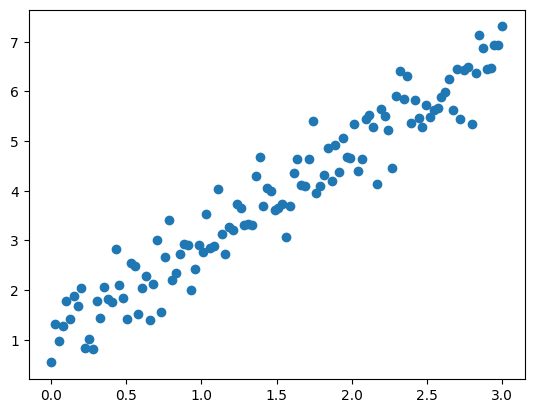

In [2]:
np.random.seed(13)

train_x = np.linspace(0, 3, 120)
train_labels = 2 * train_x + 0.9 + np.random.randn(*train_x.shape) * 0.5

plt.scatter(train_x,train_labels)

In [ ]:
input_dim = 1
output_dim = 1
learning_rate = 0.1

w = torch.tensor([100.0], reguires_grad=True,dtype=torch.float32)
b = torch.zeros(size=(output_dim,),requires_grad=True)

def f(x):
    return torch.matmul(x,w) + b

def compute_loss(labels, predictions):
    return torch.mean(torch.square(labels - predictions))

In [ ]:
def train_on_batch(x, y):
    predictions = f(x)
    loss = compute_loss(y, predictions)
    loss.backward()
    w.data.sub_(learning_rate * w.grad)
    b.data.sub_(learning_rate * b.grad)
    w.grad.zero_()
    b.grad.zero_()
    return loss